In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = np.vstack([(np.random.rand(10,2)*5),(np.random.rand(10,2)*10)])
Y = np.hstack([[0]*10,[1]*10])

dataset = pd.DataFrame(X,columns=['X1',"X2"])
dataset['Y']=Y

In [4]:
dataset

,X1,X2,Y
0,4.011861,1.674061,0
1,4.700434,1.220296,0
2,0.639354,1.905050,0
3,1.000830,3.683078,0
4,1.313663,4.175309,0
5,2.078587,0.977523,0
6,2.496509,1.537792,0
7,1.492593,2.861047,0
8,4.843101,1.984147,0
9,4.981371,4.275560,0


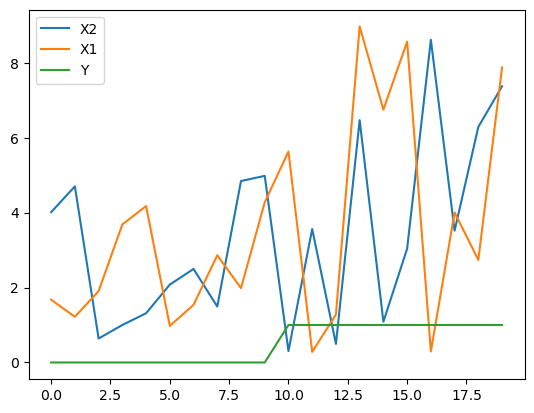

In [5]:
plt.plot(dataset,label = 'Inline Label')
plt.legend(['X2','X1','Y'])

In [6]:
# Convering Target variable to vector of number of classes

In [7]:
Z = np.zeros((20,2))
for i in range(20):
    Z[i,Y[i]]=1

In [8]:
X.shape

(20, 2)

In [10]:
Wi_1 = np.random.randn(3,2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3,2)
Bi_2 = np.random.randn(2)
Wi_1

array([[ 0.08925309,  1.28230651],
       [ 2.40183479, -0.07340842],
       [-0.13072241,  1.27113592]])

In [12]:
Bi_2

array([-1.59147028, -1.23601037])

In [13]:
Wi_2

array([[-1.3202692 ,  1.13935645],
       [ 1.42896403, -0.6634436 ],
       [ 1.98705406, -0.27169452]])

In [14]:
X.shape

(20, 2)

In [15]:
X.dot(Wi_1.T)

array([[ 2.50473039,  9.51293605,  1.60351911],
       [ 1.9843218 , 11.20008604,  0.93671004],
       [ 2.49992187,  1.39577622,  2.3379991 ],
       [ 4.81216256,  2.1334598 ,  4.55086227],
       [ 5.47127412,  2.84869936,  5.1356597 ],
       [ 1.43900472,  4.92066506,  0.97084691],
       [ 2.19474158,  5.88331452,  1.62839278],
       [ 3.80195817,  3.37493607,  3.44166475],
       [ 2.97654687, 11.48667537,  1.8890192 ],
       [ 5.92718173, 11.65056721,  4.78364168],
       [ 7.24736216,  0.31900035,  7.11739326],
       [ 0.67949688,  8.53210534, -0.10697518],
       [ 1.68483323,  1.09736867,  1.56143606],
       [12.07767429, 14.87588248, 10.55476383],
       [ 8.75130241,  2.11657539,  8.43668814],
       [11.2517041 ,  6.66663208, 10.48790323],
       [ 1.14766782, 20.66351351, -0.75011851],
       [ 5.44806267,  8.15556123,  4.62948091],
       [ 4.07026657, 14.89971264,  2.65668725],
       [10.75765714, 17.12902893,  9.04793585]])

In [16]:
# Defining the forward prpogation function


In [21]:
 def forward_prop(X,Wi_1,Bi_1,Wi_2,Bi_2):
        # first layer
        M = 1/(1+np.exp(-(X.dot(Wi_1.T)+Bi_1)))
        # second layer
        A = M.dot(Wi_2)+Bi_2
        expA = np.exp(A)
        Y = expA/expA.sum(axis=1,keepdims=True)
        return Y,M

In [22]:
forward_prop(X,Wi_1,Bi_1,Wi_2,Bi_2)

(array([[0.5861224 , 0.4138776 ],
        [0.57193712, 0.42806288],
        [0.55615263, 0.44384737],
        [0.74110161, 0.25889839],
        [0.78009392, 0.21990608],
        [0.63747003, 0.36252997],
        [0.61505062, 0.38494938],
        [0.72094199, 0.27905801],
        [0.58743899, 0.41256101],
        [0.79363641, 0.20636359],
        [0.62286337, 0.37713663],
        [0.68792115, 0.31207885],
        [0.51280044, 0.48719956],
        [0.82279529, 0.17720471],
        [0.77690969, 0.22309031],
        [0.82228985, 0.17771015],
        [0.60640018, 0.39359982],
        [0.7900524 , 0.2099476 ],
        [0.6467478 , 0.3532522 ],
        [0.8224498 , 0.1775502 ]]),
 array([[0.83485206, 0.99990388, 0.29424936],
        [0.75026091, 0.99998221, 0.17629649],
        [0.83418802, 0.75633656, 0.46496888],
        [0.98069401, 0.86650249, 0.88820232],
        [0.98991886, 0.92993046, 0.93445988],
        [0.63522237, 0.99059987, 0.18130861],
        [0.7875841 , 0.9963893 , 0.2994410

In [23]:
# Back Prpogation bt differntiating or Gradient Descent

In [24]:
def diff_Wi_2(H,Z,Y):
    return H.T.dot(Z-Y)

In [ ]:
def diff_Wi_1(X,H,Z,output,Wi_2):
    dZ= (Z-output).dot(Wi_2.T)*H*(1-H)
    return X.T.dot(Z)